<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

The actual questions to be answered is "Will the person donate blood in March 2007?"

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [ ]:
# Find the dataset described above
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [22]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [5]:
# Read data in pandas
df = pd.read_csv("../../DATA/blood transfusion/transfusion.data")

# Check data has loaded correctly
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [6]:
# Shape of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


There are 5 features.

All features are numeric integers. 

No missing values. 

The Donated in 2007 feature is a categorical feature which as been encoded. 

In [9]:
# Check numerical properties of the data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether he/she donated blood in March 2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


It looks like more of the features are right skewed with high outliers. Let's confirm this with some plots. 

c:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

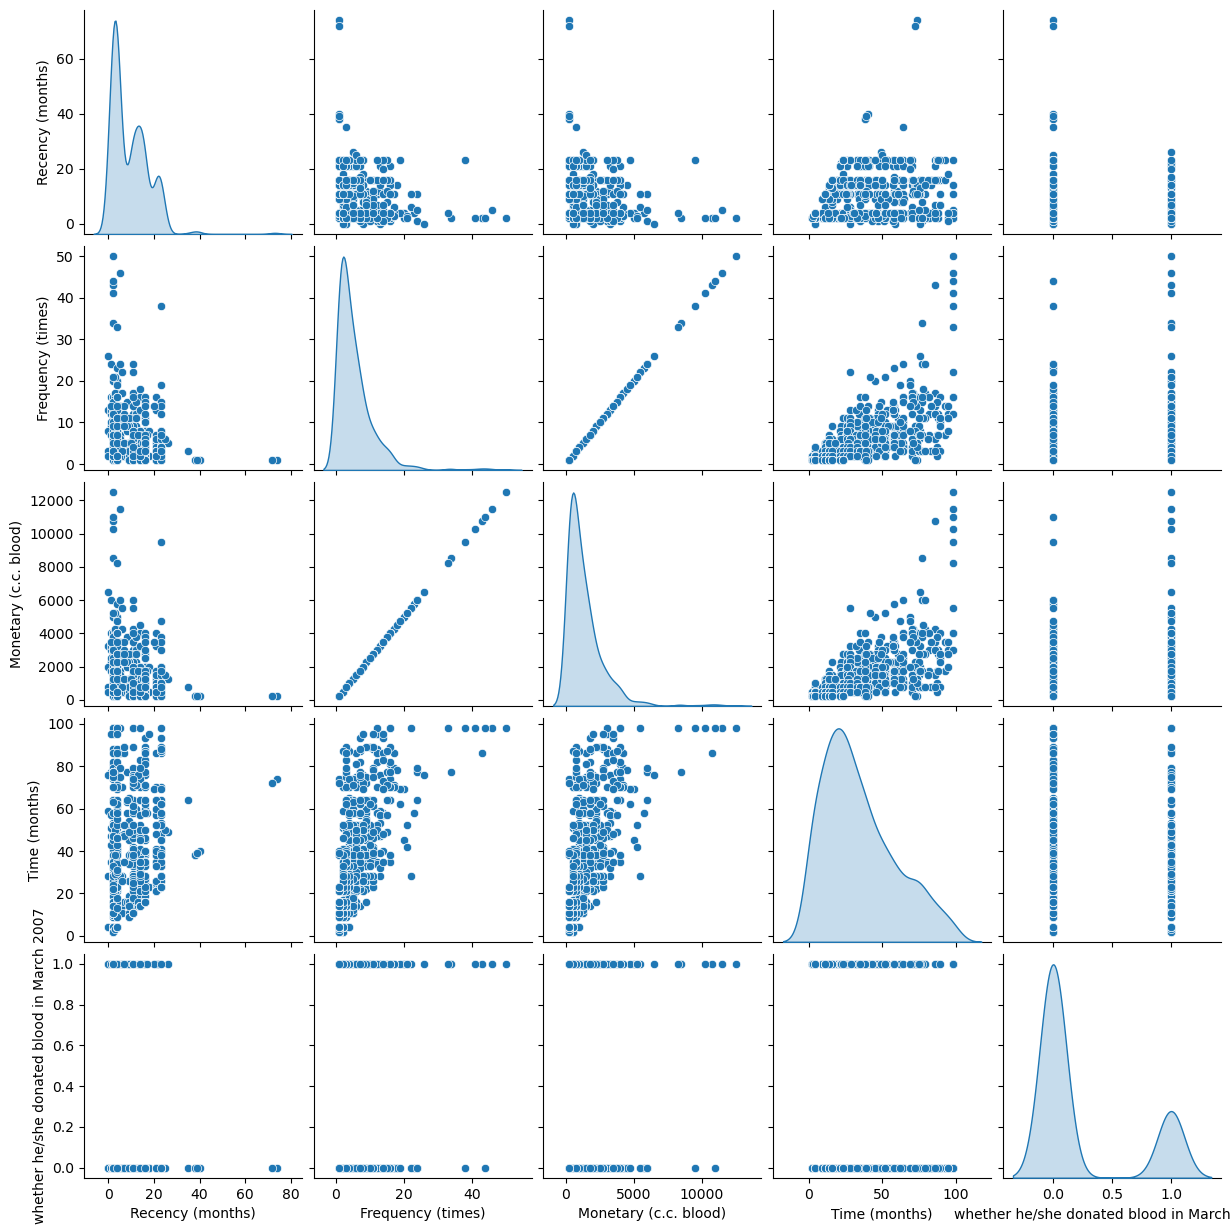

In [10]:
# Check the distribution and correlation of the features 
sns.pairplot(df, diag_kind='kde')


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [12]:
# Due to outliers, the data can be scaled using MinMaxScaler
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

c:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

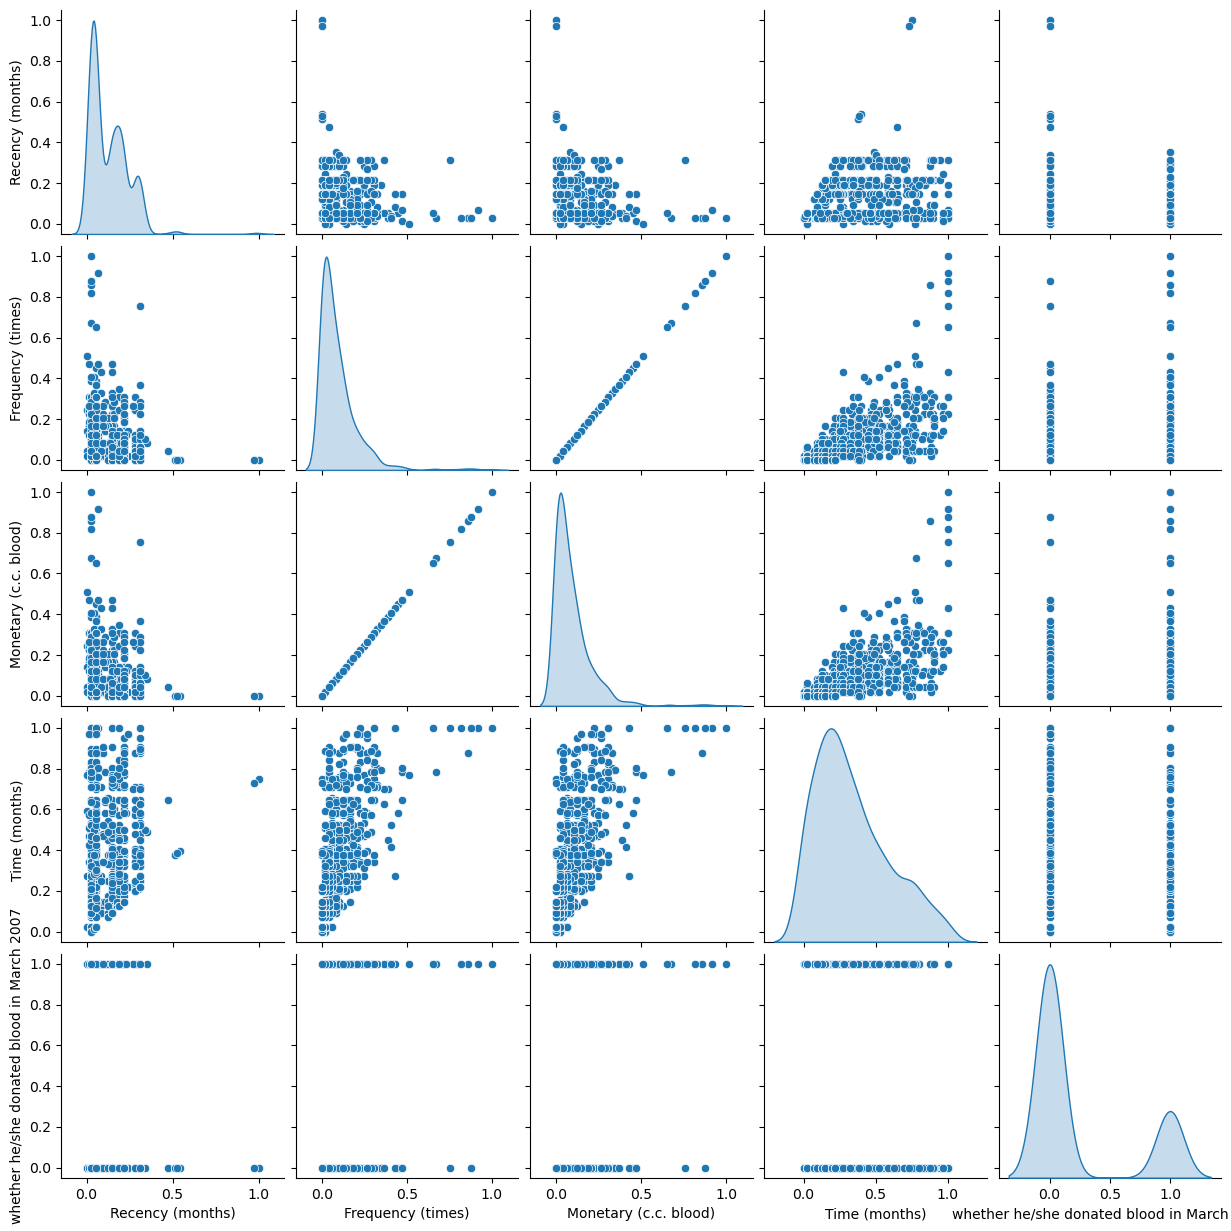

In [13]:
# Check the distribution of the data after scaling
sns.pairplot(df_scaled, diag_kind='kde')

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [17]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [18]:
# Rename target feature 
df_scaled.rename(columns={'whether he/she donated blood in March 2007': 'Donated'}, inplace=True)

In [19]:
# Split your data
X = df_scaled.drop('Donated', axis=1)
y = df_scaled['Donated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [20]:
# Choose a model or models
rfc = RandomForestClassifier()

# Step 9: Fit the Model

In [21]:
# Fit model
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [23]:
# Evaluate model against training set
train_preds = rfc.predict(X_train)

train_accuracy = accuracy_score(y_train, train_preds)
train_accuracy 

0.9381270903010034

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [24]:
# Evaluate model against test set

y_preds = rfc.predict(X_test)

test_accuracy = accuracy_score(y_test, y_preds)
test_accuracy

0.7266666666666667

The model is overfitted as the test accuracy score is much lower than the train accuracy score. 

In [42]:
# Grid search to find the optimal max_depth and n_estimators

def grid_rfc(model, depth, estimators):
    train_accuracy = []
    test_accuracy = []
    grid_output = pd.DataFrame()
    for d in depth:
        for e in estimators:
            model = RandomForestClassifier(max_depth=d, n_estimators=e)
            model.fit(X_train, y_train)
            train_preds = model.predict(X_train)
            train_accuracy.append(accuracy_score(y_train, train_preds))
            test_preds = model.predict(X_test)
            test_accuracy.append(accuracy_score(y_test, test_preds))
            new_line = pd.DataFrame({
                'Depth': [d], 
                'Estimators': [e], 
                'Train Accuracy': [accuracy_score(y_train, train_preds)], 
                'Test Accuracy': [accuracy_score(y_test, test_preds)],
                'Accuracy Diff': [accuracy_score(y_train, train_preds) - accuracy_score(y_test, test_preds)]})
            grid_output = pd.concat([grid_output, new_line])
    return train_accuracy, test_accuracy, grid_output

depth = [5, 10, 15, 20]
estimators = [10, 50, 100, 200]

train_accuracy, test_accuracy, grid_output = grid_rfc(rfc, depth, estimators)

train_accuracy = np.array(train_accuracy).reshape(4, 4)
test_accuracy = np.array(test_accuracy).reshape(4, 4)

# grid_results = pd.DataFrame({
#     'Depth': depth*4,
#     'Estimators': estimators*4,
#     'Train Accuracy': train_accuracy.flatten(),
#     'Test Accuracy': test_accuracy.flatten(),
#     'Accuracy Diff': train_accuracy.flatten() - test_accuracy.flatten()
# }).sort_values(by='Accuracy Diff', ascending=False)

grid_output.sort_values(by='Accuracy Diff', ascending=True)

,Depth,Estimators,Train Accuracy,Test Accuracy,Accuracy Diff
0,5,50,0.824415,0.806667,0.017748
0,5,100,0.831104,0.806667,0.024437
0,5,200,0.822742,0.793333,0.029409
0,5,10,0.814381,0.780000,0.034381
0,10,10,0.911371,0.733333,0.178038
0,15,10,0.926421,0.746667,0.179755
0,20,10,0.918060,0.733333,0.184727
0,10,200,0.931438,0.746667,0.184771
0,10,50,0.926421,0.733333,0.193088
0,15,100,0.938127,0.740000,0.198127


In [44]:
# Train the mode using the best parameters
rfc_best = RandomForestClassifier(max_depth=5, n_estimators=50)

# Fit the model
rfc_best.fit(X_train, y_train)

# Evaluate the model
y_preds = rfc_best.predict(X_test)

test_accuracy = accuracy_score(y_test, y_preds)

test_accuracy

0.7933333333333333

In [45]:
train_preds = rfc_best.predict(X_train)

train_accuracy = accuracy_score(y_train, train_preds)

train_accuracy

0.8244147157190636

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



